In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
  return 3*x**2 - 4*x + 5

In [3]:
f(3.0)

20.0

In [4]:
# generate numbers from -5 to 5 (not including) with step size of 0.25
xs = np.arange(-5, 5, 0.25)
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [5]:
# apply function to generated value
ys = f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

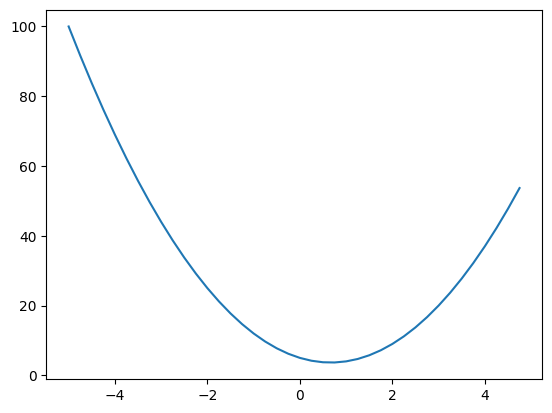

In [6]:
# plot x and y
plt.plot(xs, ys)
# we basically get a parabola. Parabolas are defined as the graph of equations
# of the form y = ax^2 + bx + c,

In [7]:
# Derivatives. We can't use things like product rules to differentiate equations.
# What is derivate. It is slope at given point i.e.
# how will the value change with very small nudge.
h = 0.00000001
x = 3.0
(f(x+h) - f(x)) / h

14.00000009255109

In [8]:
h = 0.00000001
x = -3.0
(f(x+h) - f(x)) / h

-22.00000039920269

In [9]:
# slope is zero i.e. line is parallel
h = 0.00000001
x = 2/3
(f(x+h) - f(x)) / h

0.0

In [10]:
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [11]:
# let us again look at derivates wrt a, b, c

In [12]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
a += h
d2 = a*b + c

print('d1: {}'.format(d1))
# think if d2 is more or less than d1. this will tell us sign of derivative
print('d2: {}'.format(d2))
print('slope: {}'.format((d2 - d1) / h))

# how to read it:
# (d2 - d1) is how much did it marginally moved
# remember h is tending to zero.
# and then we divide by h (again tending to zero) to normalise
# If we differentiate it mathermatically; we are left with 'b' with is -3

d1: 4.0
d2: 3.999699999999999
slope: -3.000000000010772


In [13]:
# let us try differentiating it wrt b

h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
b += h
d2 = a*b + c

print('d1: {}'.format(d1))
# think if d2 is more or less than d1. this will tell us sign of derivative
print('d2: {}'.format(d2))
print('slope: {}'.format((d2 - d1) / h))

d1: 4.0
d2: 4.0002
slope: 2.0000000000042206


In [14]:
# let us try differentiating it wrt c

h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
c += h
d2 = a*b + c

print('d1: {}'.format(d1))
# think if d2 is more or less than d1. this will tell us sign of derivative
print('d2: {}'.format(d2))
print('slope: {}'.format((d2 - d1) / h))

d1: 4.0
d2: 4.0001
slope: 0.9999999999976694


In [15]:
# To build a neural network (NN), we need a data structure
# Since, we would be doing derivative i.e. backpropagation a lot

class Value:

  def __init__(self, data, _children = (), _op = '', label = ''):
    self.data = data
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return "Value(data={})".format(self.data)

  # after showing __repr__ let us show add
  def __add__(self, other):
    return Value(self.data + other.data, (self, other), '+')

  def __mul__(self, other):
    return Value(self.data * other.data, (self, other), '*')

a = Value(2, label = 'a')
b = Value(-3, label = 'b')
c = Value(10.0, label = 'c')
# a, b
# a + b # this will internally call a.__add__(b)
# a * b
# a * b + c # we implemented the expression from above cell
# d = a*b + c
# d
# e = a * b; e.label = 'e'
# d = c + e; d.label = 'd'
# d

e = a * b; e.label = 'e'
d = c + e; d.label = 'd'
f = Value(-2, label = 'f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

In [16]:
d._prev, d._op, d.label

({Value(data=-6), Value(data=10.0)}, '+', 'd')

In [17]:
from graphviz import Digraph

def trace(root):
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    dot.node(name = uid, label = "{} | {}".format(n.label, n.data), shape = 'record')
    if n._op:
      dot.node(name = uid + n._op, label = n._op)
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

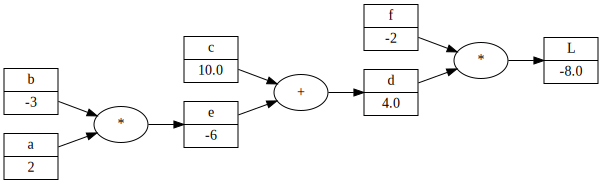

In [18]:
draw_dot(L)
# this is visualising forward pass where value turns out to be -8

In [19]:
# Now we want to run backpropagation (back pass) i.e. finding derivate at each node wrt L
# we will create a new variable called 'grad'.
# It defaults to zero i.e. it has no change at all
class Value:

  def __init__(self, data, _children = (), _op = '', label = ''):
    self.data = data
    self.grad = 0.0
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return "Value(data={})".format(self.data)

  # after showing __repr__ let us show add
  def __add__(self, other):
    return Value(self.data + other.data, (self, other), '+')

  def __mul__(self, other):
    return Value(self.data * other.data, (self, other), '*')

  # add this function when doing NN
  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1) # look at wikipedia to verify
    out = Value(t, (self, ), 'tanh')
    return out

In [20]:
from graphviz import Digraph

def trace(root):
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    dot.node(name = uid, label = "{} | {} | {}".format(n.label, n.data, n.grad), shape = 'record')
    if n._op:
      dot.node(name = uid + n._op, label = n._op)
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

In [21]:
a = Value(2, label = 'a')
b = Value(-3, label = 'b')
c = Value(10.0, label = 'c')
e = a * b; e.label = 'e'
d = c + e; d.label = 'd'
f = Value(-2, label = 'f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

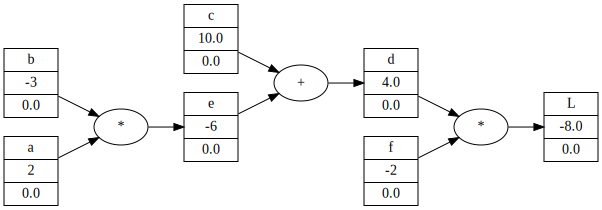

In [22]:
draw_dot(L)

In [23]:
L.grad = 1
f.grad = 4
d.grad = -2
c.grad = -2
e.grad = -2
a.grad = -2.0 * -3.0
b.grad = -2.0 * 2.0

In [24]:
# let us start by filling derivative
# derivative of L wrt L will be 1.

# let us try it by staging

# we are going to do this mathematically
# add h (which is almost zero) to each variable and normalise

# L = d * f
# dL/dd = f

# by definition
# dL/dd = (f(x + h) - f(x)) / h
#((d + h) * f - d*f) / h
# (d*f + d*h - d*f) / h = h*f / h = f

# now most important is dL/dc
# we know how dL/dd but how would dL/dc impact which goes through 'd'
# intution: dd/ dc = ?
# d = c + e
# (f(x + h) - f(x)) / h
# ((c + h + e) - (c + e)) / h
# (c + h + e - c - e) / h
# h / h = 1

# hence, dd/dc = 1 and dd/de = 1

# think about chain rule in calculus
# dL/dc = ?
# we know that dl/dd and we know dd/dc
# by chain rule: dL/dc = (dL / dd) * (dd / dc)

# dl / de = -2
# dL / da = (dL/de) * (de/da)
# e = a * b; de/da = 1

# we can check using this function quickly
# this is estimation based on small step size
def rofl():
  h = 0.0001

  a = Value(2, label = 'a')
  b = Value(-3, label = 'b')
  c = Value(10.0, label = 'c')
  e = a * b; e.label = 'e'
  d = c + e; d.label = 'd'
  f = Value(-2, label = 'f')
  L = d * f; L.label = 'L'
  L1 = L.data

  a = Value(2, label = 'a')
  b = Value(-3 + h, label = 'b')
  c = Value(10.0, label = 'c')
  e = a * b; e.label = 'e'
  d = c + e; d.label = 'd'
  f = Value(-2, label = 'f')
  L = d * f; L.label = 'L'
  L2 = L.data

  print((L2 - L1) / h)

rofl()

-4.000000000008441


In [25]:
# backpropagation is basically finding derivate in computational graph

In [26]:
# let us try to nudge L in postive direction

a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a * b;
d = c + e;
L = d * f;
L

Value(data=-7.286496)

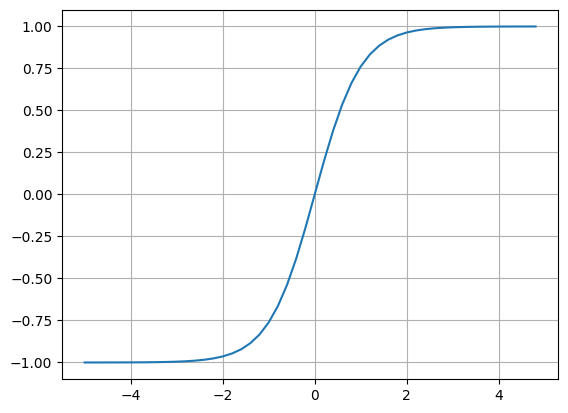

In [27]:
# what is activation function? It is kind of squashing function
plt.plot(np.arange(-5, 5, 0.2), np.tanh(np.arange(-5, 5, 0.2)))
plt.grid()

In [28]:
# let us run back propagation on an NN manually to understand

# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.8813735870195432, label='b')

x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'

# first run with out tanh
o = n.tanh(); o.label = 'o'

# draw_dot(n)
# draw_dot(o)

# play with values to show use of squashing function
# then replace b with 6.8813735870195432

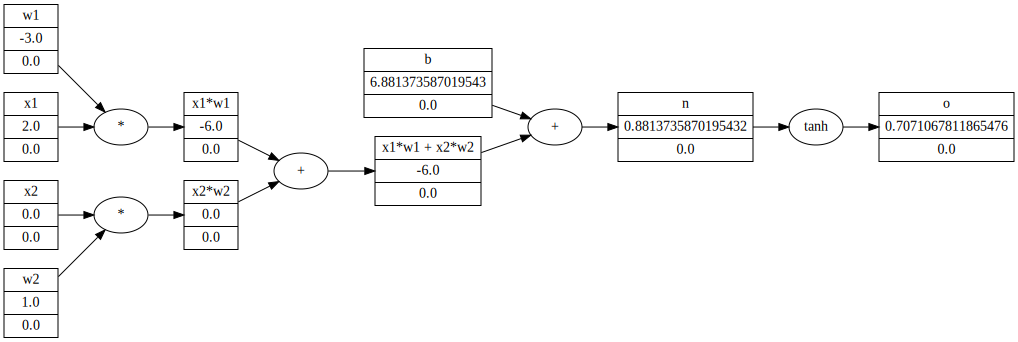

In [29]:
draw_dot(o)

In [30]:
# we really care about w(s) since we care about optimising these.



o.grad = 1 # always true

# do / dn = 1 - o**2 ; look at wikipedia
n.grad = 1 - o.data**2

# plus is just a distributor of gradient and we can just keep it
x1w1x2w2.grad = n.grad * 1
b.grad = n.grad * 1

# similarly
x1w1.grad = x1w1x2w2.grad * 1
x2w2.grad = x1w1x2w2.grad * 1

x2.grad = w2.data * x2w2.grad
w2.grad = x2w2.grad * x2.data

x1.grad = w1.data * x1w1.grad
w1.grad = x1w1.grad * x1.data

In [49]:
class Value:

  def __init__(self, data, _children = (), _op = '', label = ''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return "Value(data={})".format(self.data)

  # after showing __repr__ let us show add
  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+')
    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '*')
    def _backward():
      #add the '+' after figuring why it is required
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    self._backward = _backward
    return out

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1) # look at wikipedia to verify
    out = Value(t, (self, ), 'tanh')
    def _backward():
      self.grad = (1 - t**2) * out.grad
    out._backward = _backward
    return out

  # implement this after calling _backward() on all variables
  def backward(self):
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)
    self.grad = 1.0
    for node in reversed(topo):
      node._backward()

In [50]:
# let us run back propagation on an NN manually to understand

# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.8813735870195432, label='b')

x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'

# first run with out tanh
o = n.tanh(); o.label = 'o'

# draw_dot(n)
# draw_dot(o)

# play with values to show use of squashing function
# then replace b with 6.8813735870195432

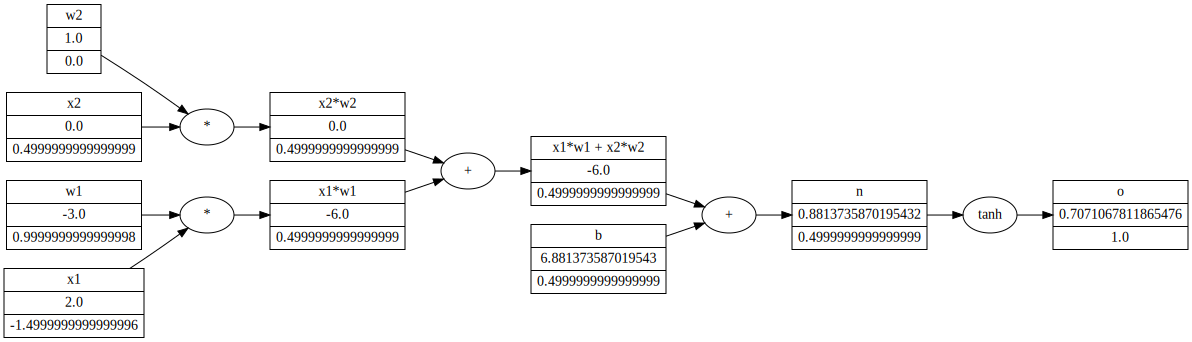

In [53]:
draw_dot(o)

In [34]:
 # for base case we initialise it with 1.
# because self.grad = 0.0
o.grad = 1
o._backward()
n._backward()
b._backward()
x1w1x2w2._backward()
x1w1._backward()
x2w2._backward()
x2._backward()
w2._backward()
x1._backward()
w1._backward()

In [52]:
o.backward()

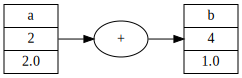

In [36]:
# there is a bug in current implementation
# in the below example: the gradient for a should be two not one.
a = Value(2, label = 'a')
b = a + a; b.label = 'b'
b.backward()
draw_dot(b)

In [114]:
# We can not do a+1 as 1 is not Value

class Value:

  def __init__(self, data, _children = (), _op = '', label = ''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, (self, other), '+')
    def _backward():
      self.grad += out.grad
      other.grad += out.grad
    out._backward = _backward
    return out

  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other), '*')
    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward
    return out

  def __pow__(self, other):
    assert isinstance(other, (int, float)), "only supports int and float"
    out = Value(self.data**other, (self, ), f'**{other}')
    def _backward():
      self.grad += other * (self.data ** (other - 1)) * out.grad
    out._backward = _backward
    return out

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')
    def _backward():
      self.grad = (1 - t**2) * out.grad
    out._backward = _backward
    return out

  def exp(self):
    x = self.data
    out = Value(math.exp(x), (self, ), 'exp')
    def _backward():
      self.grad += out.data * out.grad
    out._backward = _backward
    return out

  def backward(self):
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)
    self.grad = 1.0
    for node in reversed(topo):
      node._backward()

  def __truediv__(self, other):
    out = self * other**-1
    return out

  def __neg__(self):
    return self * -1

  def __radd__(self, other):
    return self + other

  def __rmul__(self, other):
    return self * other

  def __sub__(self, other):
    return self + (-other)

  def __repr__(self):
    return "Value(data={})".format(self.data)

In [38]:
a = Value(2)

2 * a

Value(data=4)

In [40]:
# let us define division in a slightly smarter manner to make it more generic
# a / b = a *(1/b) = a * (b ** 1)
# we can define '**' and can write grad for it.

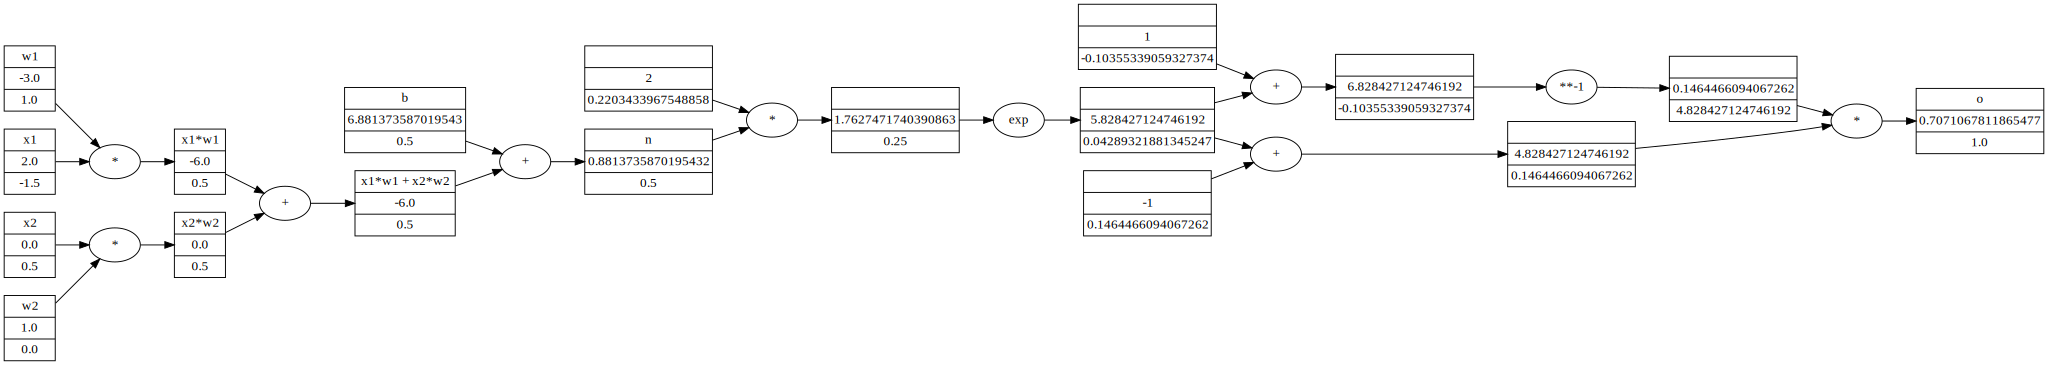

In [69]:
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.8813735870195432, label='b')

x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'

# first run with out tanh
# o = n.tanh(); o.label = 'o'

# instead let us use tanh with exp formular
e = (2*n).exp()
o = (e - 1) / (e + 1)
o.label = 'o'
o.backward()
draw_dot(o)

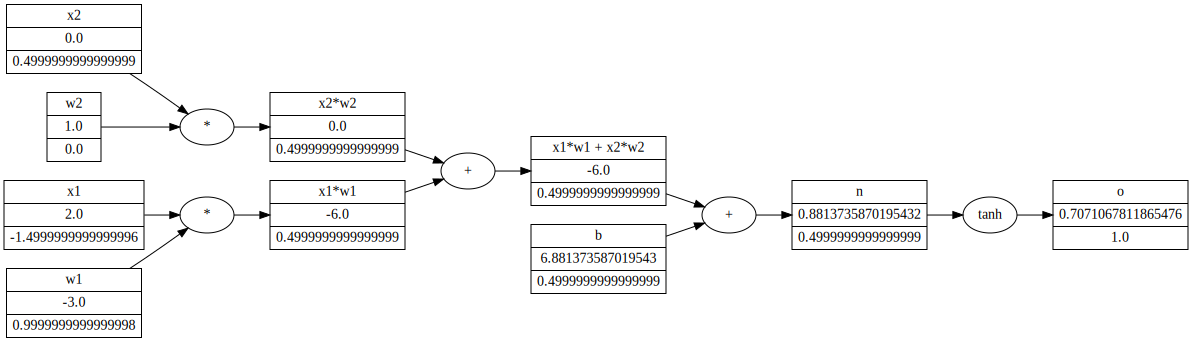

In [70]:
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.8813735870195432, label='b')

x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'

# first run with out tanh
o = n.tanh(); o.label = 'o'
o.backward()
draw_dot(o)

In [72]:
 # doing this in modern way i.e. pytorch
 import torch

 x1 = torch.Tensor([2.0]).double(); x1.requires_grad = True
 x2 = torch.Tensor([0.0]).double(); x2.requires_grad = True

 w1 = torch.Tensor([-3.0]).double(); w1.requires_grad = True
 w2 = torch.Tensor([1.0]).double(); w2.requires_grad = True

 b = torch.Tensor([6.8813735870195432]).double(); b.requires_grad = True

 n = x1*w1 + x2*w2 + b
 o = torch.tanh(n)

 print(o.data.item())
 o.backward()

 print('---')
 print('x2', x2.grad.item())
 print('w2', w2.grad.item())
 print('x1', x1.grad.item())
 print('w1', w1.grad.item())

0.7071066904050358
---
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [117]:
import random

class Neuron:
  def __init__(self, nin):
    self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
    self.b = Value(random.uniform(-1, 1))

  def __call__(self, x):
    #zip(self.w, x) to get pairs
    act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
    out = act.tanh()
    return out

  def parameters(self): # torch as same API
    return self.w + [self.b]

class Layer:
  def __init__(self, nin, nout):
    self.neurons = [Neuron(nin) for _ in range(nout)]

  def __call__(self, x):
    outs = [n(x) for n in self.neurons]
    return outs[0] if len(outs) == 1 else outs

  def parameters(self):
    return [p for neuron in self.neurons for p in neuron.parameters()]

class MLP:

  def __init__(self, nin, nouts):
    sz = [nin] + nouts
    self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

  def __call__(self, x):
    for layer in self.layers:
      x = layer(x)
    return x

  def parameters(self):
    return [p for layer in self.layers for p in layer.parameters()]

# start by implementing neuron, then add Layer, then add MLP
# x = [2.0, 3.0]
# n = Layer(2, 3)
# n(x) # keep playing because we have random

# example for MLP
# x = [2.0, 3.0, -1.0]
# n = MLP(3, [4, 4, 1])
# n(x)

In [118]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

Value(data=0.9676098360002678)

In [120]:
# n.parameters()
len(n.parameters())

41

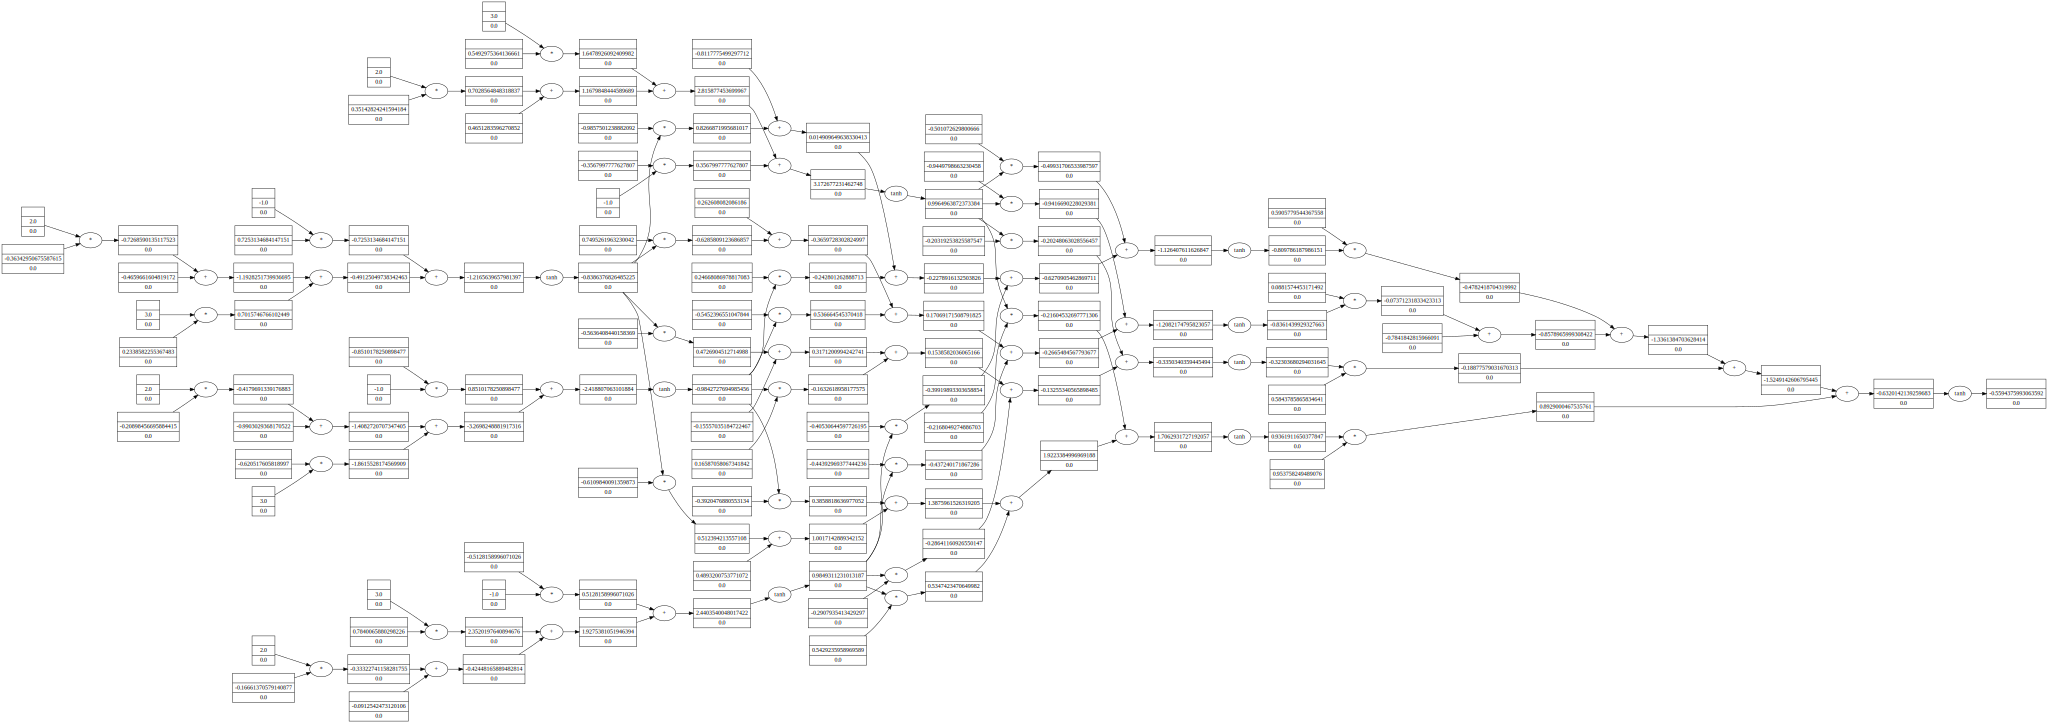

In [97]:
draw_dot(n(x))

In [121]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0]

In [157]:
# without any training
ypred = [n(x) for x in xs]
ypred

[Value(data=-0.6623685864241715),
 Value(data=-0.7270753545558064),
 Value(data=-0.8180538216234716),
 Value(data=-0.7668410934630643)]

In [164]:
# the trick is to somehow come up with a single number to see the performance of net
# this single number is called
# the goal is get this number; loss as small as possible

loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
loss

Value(data=5.992789040596317)

In [162]:
loss.backward()

In [ ]:
draw_dot(loss)

In [125]:
n.layers[0].neurons[0].w[0].grad

-0.03512661493300333

In [163]:
# now we want to slightly nudge the parameter value by small step size in direction of
# think of this as gradient which in direction of loss
# we want to minimise the loss; hence we use negative sign
for p in n.parameters():
  p.data += -0.1 * p.grad

In [166]:
# since we tried to align our parameters; loss should have gone down

In [173]:
# let us implement a training loop now

xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0]

n = MLP(3, [4, 4, 1])


for i in range(20):
  ypred = [n(x) for x in xs]
  # forward pass
  loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
  #backward pass
  loss.backward()
  # try to fix
  for p in n.parameters():
    p.data += -0.05 * p.grad

  print(i, loss.data)

[n(x) for x in xs]

0 5.45211553810867
1 4.91673015964924
2 4.749114684668526
3 4.062500671093211
4 3.8815758959649456
5 3.803504199025776
6 3.6523399801669023
7 3.2395043027649195
8 2.887092545505319
9 2.212041740837393
10 0.37741817485919577
11 0.07891654201164772
12 0.02147073177199081
13 0.007029889911390361
14 0.0025543900114908076
15 0.000950458150648182
16 0.0003160906212144634
17 0.00012231413718960532
18 9.850759066148916e-05
19 0.0001267005414959935


[Value(data=0.9913179292717197),
 Value(data=-0.9999997389675931),
 Value(data=-0.9999999905141116),
 Value(data=0.9871419828507703)]

In [195]:
# there is a bug in above code. We do not flush the grad after tweaking the data.
# all the backward operation do a '+' and it just keep increasing.


# xs = [
#     [2.0, 3.0, -1.0],
#     [3.0, -1.0, 0.5],
#     [0.5, 1.0, 1.0],
#     [1.0, 1.0, -1.0],
# ]
# ys = [1.0, -1.0, -1.0, 1.0]

# n = MLP(3, [4, 4, 1])


for i in range(20):
  ypred = [n(x) for x in xs]
  # forward pass
  loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
  #backward pass
  for p in n.parameters():
    p.grad = 0.0
  loss.backward()
  # try to fix
  for p in n.parameters():
    p.data += -0.05 * p.grad

  print(i, loss.data)

[n(x) for x in xs]

0 0.0017091499183641051
1 0.0017042943635970902
2 0.0016994655547468956
3 0.001694663273810487
4 0.0016898873051337704
5 0.0016851374353802438
6 0.0016804134534999962
7 0.0016757151506992976
8 0.001671042320410651
9 0.001666394758263284
10 0.0016617722620541646
11 0.001657174631719409
12 0.0016526016693061908
13 0.0016480531789450797
14 0.001643528966822775
15 0.0016390288411553577
16 0.0016345526121618007
17 0.001630100092038083
18 0.0016256710949315485
19 0.0016212654369157553


[Value(data=0.9814549470594968),
 Value(data=-0.9861385907020344),
 Value(data=-0.9748781145220523),
 Value(data=0.9787934880353532)]

In [196]:
# https://github.com/pytorch/pytorch/blob/main/aten/src/ATen/native/cpu/BinaryOpsKernel.cpp#L914